In [1]:
import pandas as pd

In [30]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [2]:
train_datapath = './data/train'

In [3]:
import os

import matplotlib.pyplot as plt

%matplotlib notebook

In [255]:
tag_df = pd.read_csv(os.path.join(train_datapath, 'train_tag.csv'))

In [256]:
tag_df.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0,M,41,B,B,Z,NaN,3,0,...,-1,0,0,0,3,1,0,3492,-1,10
1,U557810,0,M,35,A,NaN,G,NaN,4,0,...,-1,0,0,0,1,1,0,4575,-1,10
2,U1E9240,0,M,53,B,A,C,C,9,0,...,-1,0,0,0,7,2,0,4894,-1,40
3,U6DED00,0,F,41,B,NaN,Z,NaN,0,0,...,-1,0,0,0,1,1,0,4938,-1,10
4,UDA8E28,0,F,42,B,B,Z,B,3,1,...,-1,0,0,0,2,7,0,2378,-1,20


In [24]:
tag_df.describe()

,flag,age,l6mon_daim_aum_cd,bk1_cur_year_mon_avg_agn_amt_cd,pl_crd_lmt_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
count,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000,39923.000000
mean,0.224257,34.325727,0.875235,0.403652,0.187060,3.690179,1.109110,1.440924,1221.380608,1293.431305,8.700999
std,0.417097,8.541069,1.354406,1.293567,0.963996,2.124529,2.521372,1.497116,1604.667054,1270.756497,7.894769
min,0.000000,19.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,0.000000,28.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,-1.000000,360.000000,0.000000
50%,0.000000,33.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,493.000000,861.000000,10.000000
75%,0.000000,39.000000,1.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1851.000000,1810.000000,10.000000
max,1.000000,84.000000,9.000000,10.000000,9.000000,8.000000,178.000000,173.000000,9538.000000,6086.000000,80.000000


In [ ]:
gdr_cd

共40000行

In [25]:
tag_df.dtypes

id                                 object
flag                                int64
gdr_cd                             object
age                                 int64
mrg_situ_cd                        object
edu_deg_cd                         object
acdm_deg_cd                        object
deg_cd                             object
job_year                           object
ic_ind                             object
fr_or_sh_ind                       object
dnl_mbl_bnk_ind                    object
dnl_bind_cmb_lif_ind               object
hav_car_grp_ind                    object
hav_hou_grp_ind                    object
l6mon_agn_ind                      object
frs_agn_dt_cnt                     object
vld_rsk_ases_ind                   object
fin_rsk_ases_grd_cd                object
confirm_rsk_ases_lvl_typ_cd        object
cust_inv_rsk_endu_lvl_cd           object
l6mon_daim_aum_cd                   int64
tot_ast_lvl_cd                     object
pot_ast_lvl_cd                    

In [257]:
tag_df.set_index('id', drop= True, inplace= True)

In [263]:
good_users= ['U7A4BAD', 'U557810', 'U1E9240','UDA8E28',  ]
bad_users = ['UB67E38', 'UF9A1F6', 'U1E3740', 'UCF3F1A', 'U85E659']

In [27]:
label = tag_df['flag']

tag_df = tag_df.drop(columns= 'flag')

In [28]:
tag_df.head()

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
id,,,,,,,,,,,,,,,,,,,,,
U7A4BAD,M,41,B,B,Z,NaN,3,0,0,0,...,-1,0,0,0,3,1,0,3492,-1,10
U557810,M,35,A,NaN,G,NaN,4,0,0,0,...,-1,0,0,0,1,1,0,4575,-1,10
U1E9240,M,53,B,A,C,C,9,0,0,1,...,-1,0,0,0,7,2,0,4894,-1,40
U6DED00,F,41,B,NaN,Z,NaN,0,0,0,0,...,-1,0,0,0,1,1,0,4938,-1,10
UDA8E28,F,42,B,B,Z,B,3,1,1,1,...,-1,0,0,0,2,7,0,2378,-1,20


In [77]:
tag_num_df = tag_df.loc[:, tag_df.dtypes== np.int64]

tag_num_df.head()

#tag_num_df[tag_num_df == -1] = np.nan


,age,l6mon_daim_aum_cd,bk1_cur_year_mon_avg_agn_amt_cd,pl_crd_lmt_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
id,,,,,,,,,,
U7A4BAD,41,0,0,0,3,1,0,3492,-1,10
U557810,35,0,0,0,1,1,0,4575,-1,10
U1E9240,53,7,8,0,7,2,0,4894,-1,40
U6DED00,41,0,0,0,1,1,0,4938,-1,10
UDA8E28,42,5,0,6,2,7,0,2378,-1,20


-1 所占行数

In [78]:
np.sum(tag_num_df == -1, axis = 0)

age                                    0
l6mon_daim_aum_cd                    500
bk1_cur_year_mon_avg_agn_amt_cd      500
pl_crd_lmt_cd                        493
perm_crd_lmt_cd                        7
cur_debit_cnt                          0
cur_credit_cnt                         0
cur_debit_min_opn_dt_cnt           12761
cur_credit_min_opn_dt_cnt           2633
cur_debit_crd_lvl                      0
dtype: int64

In [49]:
tag_num_df.head()

,age,l6mon_daim_aum_cd,bk1_cur_year_mon_avg_agn_amt_cd,pl_crd_lmt_cd,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
id,,,,,,,,,,
U7A4BAD,41,0.0,0.0,0.0,3.0,1,0,3492.0,NaN,10
U557810,35,0.0,0.0,0.0,1.0,1,0,4575.0,NaN,10
U1E9240,53,7.0,8.0,0.0,7.0,2,0,4894.0,NaN,40
U6DED00,41,0.0,0.0,0.0,1.0,1,0,4938.0,NaN,10
UDA8E28,42,5.0,0.0,6.0,2.0,7,0,2378.0,NaN,20


In [46]:
tag_cat_df = tag_df.loc[:, tag_df.dtypes == np.dtype('O')]

In [47]:
tag_cat_df.head()

,gdr_cd,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,dnl_bind_cmb_lif_ind,...,l12_mon_fnd_buy_whl_tms,l12_mon_insu_buy_whl_tms,l12_mon_gld_buy_whl_tms,loan_act_ind,ovd_30d_loan_tot_cnt,his_lng_ovd_day,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type
id,,,,,,,,,,,,,,,,,,,,,
U7A4BAD,M,B,B,Z,NaN,3,0,0,0,1,...,0,0,0,0,0,0,-1,0,0,0
U557810,M,A,NaN,G,NaN,4,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
U1E9240,M,B,A,C,C,9,0,0,1,1,...,0,0,0,0,0,0,-1,0,0,0
U6DED00,F,B,NaN,Z,NaN,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
UDA8E28,F,B,B,Z,B,3,1,1,1,0,...,0,0,0,1,0,4,-1,0,0,0


取一列查看情况

In [56]:
t= tag_cat_df['ic_ind'].loc[np.logical_not(tag_cat_df['ic_ind'].isin(('0', '1')))]

In [57]:
t

id
UC06E4C    \N
U7990AD    \N
U5C63FB    \N
U91C69E    \N
UA5CD06    \N
           ..
U20520E    \N
UFA59D1    \N
UF482C7    \N
U118EB6    \N
U10C3AE    \N
Name: ic_ind, Length: 493, dtype: object

脏数据 \N, 定位未知

In [58]:
set(tag_cat_df['job_year'])

{'0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '5',
 '6',
 '7',
 '8',
 '9',
 '99',
 '\\N'}

脏数据 '\\N'

In [60]:
col_set = dict()
for col in tag_cat_df:
    col_set[col] = set(tag_cat_df[col])

In [62]:
import re

In [67]:
rp = re.compile('\d+')

In [76]:
for col in col_set:
    print(col)
    for ct in col_set[col]:
        if not isinstance(ct, str) or not rp.match(ct):
            print('\t', ct)

gdr_cd
	 M
	 F
	 \N
mrg_situ_cd
	 B
	 Z
	 O
	 \N
	 ~
	 A
edu_deg_cd
	 nan
	 B
	 G
	 Z
	 L
	 M
	 D
	 \N
	 ~
	 C
	 K
	 A
	 F
	 J
acdm_deg_cd
	 nan
	 G
	 Z
	 \N
	 D
	 C
	 F
deg_cd
	 nan
	 B
	 Z
	 \N
	 D
	 ~
	 C
	 A
job_year
	 \N
ic_ind
	 \N
fr_or_sh_ind
	 \N
dnl_mbl_bnk_ind
	 \N
dnl_bind_cmb_lif_ind
	 \N
hav_car_grp_ind
	 \N
hav_hou_grp_ind
	 \N
l6mon_agn_ind
	 \N
frs_agn_dt_cnt
	 \N
	 -1
vld_rsk_ases_ind
	 \N
fin_rsk_ases_grd_cd
	 -1
	 \N
confirm_rsk_ases_lvl_typ_cd
	 -1
	 \N
cust_inv_rsk_endu_lvl_cd
	 \N
tot_ast_lvl_cd
	 -1
	 \N
pot_ast_lvl_cd
	 -1
	 \N
l12mon_buy_fin_mng_whl_tms
	 \N
l12_mon_fnd_buy_whl_tms
	 \N
l12_mon_insu_buy_whl_tms
	 \N
l12_mon_gld_buy_whl_tms
	 \N
loan_act_ind
	 \N
ovd_30d_loan_tot_cnt
	 \N
his_lng_ovd_day
	 \N
hld_crd_card_grd_cd
	 -1
	 \N
crd_card_act_ind
	 \N
l1y_crd_card_csm_amt_dlm_cd
	 \N
atdd_type
	 nan
	 \N


脏值主要是：'\N',应该代表未知，同时，部分数值属性包含-1以及空值，应该也代表未知

不清楚 -1 是否也代表未知，检查一下-1出现的次数

In [79]:
np.sum(tag_cat_df== '-1', axis = 0)

gdr_cd                             0
mrg_situ_cd                        0
edu_deg_cd                         0
acdm_deg_cd                        0
deg_cd                             0
job_year                           0
ic_ind                             0
fr_or_sh_ind                       0
dnl_mbl_bnk_ind                    0
dnl_bind_cmb_lif_ind               0
hav_car_grp_ind                    0
hav_hou_grp_ind                    0
l6mon_agn_ind                      0
frs_agn_dt_cnt                 30634
vld_rsk_ases_ind                   0
fin_rsk_ases_grd_cd            30870
confirm_rsk_ases_lvl_typ_cd    27518
cust_inv_rsk_endu_lvl_cd           0
tot_ast_lvl_cd                 30425
pot_ast_lvl_cd                 16668
l12mon_buy_fin_mng_whl_tms         0
l12_mon_fnd_buy_whl_tms            0
l12_mon_insu_buy_whl_tms           0
l12_mon_gld_buy_whl_tms            0
loan_act_ind                       0
ovd_30d_loan_tot_cnt               0
his_lng_ovd_day                    0
h

在一部分数据中，-1所占比例很高

In [80]:
col_set['tot_ast_lvl_cd']

{'-1',
 '0',
 '1',
 '10',
 '11',
 '12',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '\\N'}

'\\N'可能代表没有数据，-1则代表模型无法给出可信的结果
应该同样理解为未知

另外，总资产级别代码是否应该认定为类别属性？
既然是级别，应该认定为数值属性

## 查看历史交易数据

In [90]:
from collections import Counter

In [91]:
train_trd_df = pd.read_csv(os.path.join(train_datapath, 'train_trd.csv'), parse_dates= ['trx_tm'] )

In [92]:
train_trd_df.head(100)

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62
...,...,...,...,...,...,...,...,...
95,UD12259,0,B,B,1,103,2019-06-09 12:53:37,-35.00
96,UD12259,0,C,B,3,309,2019-06-14 13:04:40,60.00
97,UD12259,0,B,B,1,136,2019-05-01 18:02:32,-168.00
98,UD12259,0,B,B,1,136,2019-06-10 18:22:00,-478.00


In [ ]:
train_trd_df.dtypes

### 查看用户历史交易分布

In [365]:
trd_count= train_trd_df.groupby('id')['flag'].count()

In [367]:
trd_count.describe()

count    31993.000000
mean        42.734692
std         87.548169
min          1.000000
25%          5.000000
50%         15.000000
75%         46.000000
max       5836.000000
Name: flag, dtype: float64

### 查看支付方式属性

In [94]:
flg3_count = Counter(train_trd_df['Dat_Flg3_Cd'])

In [95]:
flg3_count

Counter({'B': 661136, 'A': 695630, 'C': 10445})

#### 共三种支付方式

### 查看支付类别属性

In [96]:
flg1_count = Counter(train_trd_df['Dat_Flg1_Cd'])

In [97]:
flg1_count

Counter({'B': 1068119, 'C': 299092})

#### 两种类别，收入和支出， 可以统计收入和支出的行为数目

### 查看收支一级分类代码

In [98]:
cod1_counter = Counter(train_trd_df['Trx_Cod1_Cd'])

In [99]:
cod1_counter

Counter({1: 956662, 3: 239078, 2: 171471})

### 查看收支二级分类代码

In [100]:
cod2_counter = Counter(train_trd_df['Trx_Cod2_Cd'])

In [101]:
cod2_counter

Counter({116: 23696,
         136: 220378,
         113: 10898,
         101: 14976,
         104: 25921,
         309: 97218,
         103: 58876,
         114: 3180,
         209: 26916,
         117: 51679,
         128: 39153,
         108: 13932,
         134: 45645,
         111: 70659,
         310: 37609,
         129: 3338,
         102: 55049,
         123: 20982,
         307: 9858,
         112: 19309,
         118: 10726,
         213: 76653,
         109: 2935,
         125: 4345,
         130: 9709,
         127: 1893,
         308: 77705,
         131: 24257,
         132: 180646,
         135: 19032,
         208: 33827,
         205: 1920,
         201: 6830,
         204: 18265,
         202: 275,
         133: 10655,
         306: 2087,
         301: 9127,
         107: 6560,
         302: 4513,
         110: 2991,
         126: 2417,
         207: 3667,
         203: 375,
         122: 1328,
         210: 2258,
         115: 469,
         105: 834,
         206: 34

In [102]:
len(cod2_counter)

56

#### 共56种细分收支分类

一共过去60天的历史交易行为数据，可以统计过去一周，两周，一个月，以及两个月的历史交易行为，构造统计特征，包括总量和平均特征，并且可以构造平均值的变化情况特征

In [104]:
train_trd_df['trx_tm'].describe()

count                 1367211
unique                1088223
top       2019-06-01 00:29:49
freq                      704
first     2019-05-01 00:00:00
last      2019-06-30 23:59:59
Name: trx_tm, dtype: object

In [509]:
trd_perday= train_trd_df.groupby('id')['trx_tm'].count() / 60

In [515]:
trd_count= train_trd_df.groupby('id')['trx_tm'].count()

In [511]:
%matplotlib notebook

In [516]:
trd_count.describe()

count    31993.000000
mean        42.734692
std         87.548169
min          1.000000
25%          5.000000
50%         15.000000
75%         46.000000
max       5836.000000
Name: trx_tm, dtype: float64

<IPython.core.display.Javascript object>


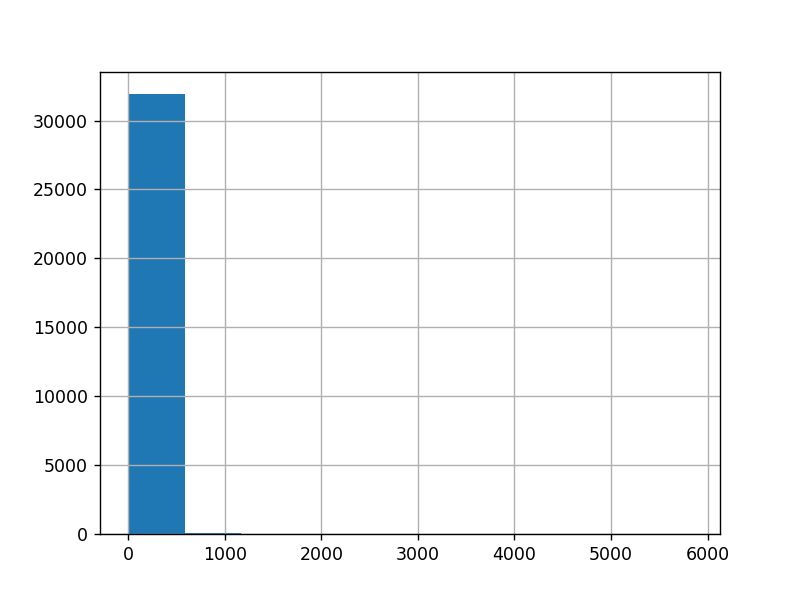

In [517]:
trd_count.hist()

In [513]:
trd_perday.describe()

count    31993.000000
mean         0.712245
std          1.459136
min          0.016667
25%          0.083333
50%          0.250000
75%          0.766667
max         97.266667
Name: trx_tm, dtype: float64

过去一周


In [254]:
train_trd_df.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


In [131]:
cat_cols = ['Dat_Flg1_Cd', 'Dat_Flg3_Cd', 'Trx_Cod1_Cd', 'Trx_Cod2_Cd']

#### 类别属性转变为onehot, 方便统计

In [135]:
from sklearn.preprocessing import OneHotEncoder

In [138]:
encoder = OneHotEncoder()
data = encoder.fit_transform(train_trd_df[cat_cols])

In [142]:
encoder.categories_

[array(['B', 'C'], dtype=object),
 array(['A', 'B', 'C'], dtype=object),
 array([1, 2, 3]),
 array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 122, 123, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 201, 202, 203, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 301, 302, 303, 304, 305, 306, 307,
        308, 309, 310, 311])]

In [143]:
feat_name_ls = []
for i, col in enumerate(cat_cols):
    for cat in encoder.categories_[i]:
        feat_name_ls.append('%s_%s' %(col, cat))

In [148]:
train_trd_cat_arr = data.toarray()

train_trd_oh_df = pd.DataFrame(train_trd_cat_arr, index = train_trd_df.index, columns = feat_name_ls)

new_train_trd_df = pd.concat([train_trd_oh_df, train_trd_df[['trx_tm', 'id', 'cny_trx_amt']]], axis = 1)

In [520]:
res_df= new_train_trd_df.groupby('id')['cny_trx_amt'].sum()

In [523]:
res_df.describe()

count    3.199300e+04
mean     2.090986e+02
std      1.200153e+05
min     -9.997652e+06
25%     -1.480500e+03
50%      0.000000e+00
75%      1.039630e+03
max      9.916500e+06
Name: cny_trx_amt, dtype: float64

恰好有一半人正收入，一半人负收入。。。

In [480]:
cat_amt_feat_names = [feat_name + '_amt' for feat_name in feat_name_ls]

In [502]:
offset= Week(2)
suffix = 'l2w'

In [487]:
trd_df = new_train_trd_df

In [506]:
def get_trd_cat_stat(trd_df, offset, suffix): 
    trd_cat_amt_df= pd.DataFrame(trd_df[feat_name_ls].values * trd_df[['cny_trx_amt', ]].values, columns = cat_amt_feat_names, index = trd_df.index) 

    trd_cat_amt_df = pd.concat([trd_cat_amt_df, trd_df[['id', 'trx_tm', 'cny_trx_amt']]], axis= 1)

    trd_cat_sum_df = trd_cat_amt_df[trd_cat_amt_df['trx_tm'] > last - offset].groupby('id')[cat_amt_feat_names].sum()

    trd_cat_sum_df['total_sum'] = trd_cat_amt_df[trd_cat_amt_df['trx_tm'] > last - offset].groupby('id')['cny_trx_amt'].sum()

    for feat in cat_amt_feat_names:
        trd_cat_sum_df[feat + '_ratio'] = trd_cat_sum_df[feat] / (trd_cat_sum_df['total_sum'] + 1.77)

    trd_cat_sum_df.rename(columns = lambda s: s + '_' + suffix, inplace = True)
    return trd_cat_sum_df

In [507]:
test = get_trd_cat_stat(new_train_trd_df, DateOffset(months = 2), 'l2m')

In [508]:
test.head()

,Dat_Flg1_Cd_B_amt_l2m,Dat_Flg1_Cd_C_amt_l2m,Dat_Flg3_Cd_A_amt_l2m,Dat_Flg3_Cd_B_amt_l2m,Dat_Flg3_Cd_C_amt_l2m,Trx_Cod1_Cd_1_amt_l2m,Trx_Cod1_Cd_2_amt_l2m,Trx_Cod1_Cd_3_amt_l2m,Trx_Cod2_Cd_101_amt_l2m,Trx_Cod2_Cd_102_amt_l2m,...,Trx_Cod2_Cd_302_amt_ratio_l2m,Trx_Cod2_Cd_303_amt_ratio_l2m,Trx_Cod2_Cd_304_amt_ratio_l2m,Trx_Cod2_Cd_305_amt_ratio_l2m,Trx_Cod2_Cd_306_amt_ratio_l2m,Trx_Cod2_Cd_307_amt_ratio_l2m,Trx_Cod2_Cd_308_amt_ratio_l2m,Trx_Cod2_Cd_309_amt_ratio_l2m,Trx_Cod2_Cd_310_amt_ratio_l2m,Trx_Cod2_Cd_311_amt_ratio_l2m
id,,,,,,,,,,,,,,,,,,,,,
U000101,-7902.43,7828.74,32.26,-105.95,0.0,-7872.24,7543.94,254.61,0.0,-88.0,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-3.540184,-0.000000,-0.0
U00015C,-56630.00,27300.00,0.00,-29330.00,0.0,-56630.00,0.00,27300.00,0.0,0.0,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.930844,-0.000000,-0.0
U0001B8,-8840.98,10535.97,1694.99,0.00,0.0,-2640.98,2735.97,1600.00,0.0,-75.5,...,-3.536151,0.0,0.0,0.0,0.0,0.0,4.479125,0.000000,0.000000,0.0
U00025B,-24606.87,29908.88,-1.49,5303.50,0.0,-15573.41,0.00,20875.42,-13893.2,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,5.639163,-1.703212,0.0
U000437,-80562.19,64495.47,-13079.17,-2987.55,0.0,-7274.37,61207.65,-70000.00,0.0,0.0,...,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,4.357312,-0.000000,-0.000000,-0.0


### 做交易行为的时间统计

将一天的时间划分为8份，三小时一份

In [412]:
new_train_trd_df['tm_slot'] = new_train_trd_df['trx_tm'].dt.hour // 3

new_train_trd_df['is_weekend'] = new_train_trd_df['trx_tm'].dt.weekday >= 5

In [376]:
offset = Week(2)
suffix = 'last2week'

In [393]:
def get_trd_tm_slot_stat(trd_df, offset, suffix):
    tm_slot_df = trd_df[new_train_trd_df['trx_tm'] > last - offset].groupby('id')['tm_slot'].agg(['mean', 'std'])

    tm_slot_df.rename(columns = lambda s: 'trd_tm_slot_' + s + '_' + suffix, inplace= True)
    
    weekend_df = trd_df[new_train_trd_df['trx_tm'] > last - offset].groupby('id')['is_weekend'].agg(['mean', 'sum'])
    
    weekend_df = trd_df[new_train_trd_df['trx_tm'] > last - offset].groupby('id')['is_weekend'].agg(['mean', 'sum'])

    weekend_df.rename(columns = lambda s: 'weekend_trd_' + s + '_' + suffix, inplace = True)
    
    ret_df = pd.concat([tm_slot_df, weekend_df], axis= 1)
    
    return ret_df

SyntaxError: invalid syntax (<ipython-input-393-877e25413db7>, line 1)

In [406]:
coarse_feat_names = []
for i, col in enumerate(cat_cols):
    if i > 2:
        break;
    for cat in encoder.categories_[i]:
        coarse_feat_names.append('%s_%s' %(col, cat))

In [429]:
offset = DateOffset(months = 2)
suffix = 'last2month'

In [477]:
def get_tm_slot_stat(trd_df, offset, suffix):
    tm_slot_sub_count= trd_df[trd_df['trx_tm'] > last - offset][coarse_feat_names + ['id', 'tm_slot', 'is_weekend']].groupby(['id', 'tm_slot']).agg(['sum', 'mean']).unstack()

    tm_slot_sub_count.fillna(0, inplace= True)

    tm_slot_sub_count.columns =[ str(col[0]) + '_' + str(col[1]) + '_tm_slot_' + str(col[2]) + '_' + suffix  for col in tm_slot_sub_count.columns]


    tm_slot_stat =  trd_df.loc[trd_df['trx_tm'] > last - offset].groupby(['id', 'tm_slot'])['trx_tm'].count().unstack()

    tm_slot_stat.fillna(0, inplace= True)

    tm_slot_stat_ratio = tm_slot_stat / np.sum(tm_slot_stat.values, axis = 1, keepdims= True)

    tm_slot_stat_ratio.rename(columns= lambda s: 'tm_slot_' + str(s) + '_ratio_' + suffix, inplace= True)

    tm_slot_stat.rename(columns= lambda s: 'tm_slot_' + str(s) + '_count_' + suffix, inplace= True)

    tm_slot_stat_df = pd.concat([tm_slot_stat, tm_slot_stat_ratio, tm_slot_sub_count], axis = 1)
    
    return tm_slot_stat_df


In [478]:
tm_slot_stat_df = get_tm_slot_stat(new_train_trd_df, DateOffset(months = 2), 'last2month')

In [479]:
tm_slot_stat_df.head()

,tm_slot_0_count_last2month,tm_slot_1_count_last2month,tm_slot_2_count_last2month,tm_slot_3_count_last2month,tm_slot_4_count_last2month,tm_slot_5_count_last2month,tm_slot_6_count_last2month,tm_slot_7_count_last2month,tm_slot_0_ratio_last2month,tm_slot_1_ratio_last2month,...,is_weekend_sum_tm_slot_6_last2month,is_weekend_sum_tm_slot_7_last2month,is_weekend_mean_tm_slot_0_last2month,is_weekend_mean_tm_slot_1_last2month,is_weekend_mean_tm_slot_2_last2month,is_weekend_mean_tm_slot_3_last2month,is_weekend_mean_tm_slot_4_last2month,is_weekend_mean_tm_slot_5_last2month,is_weekend_mean_tm_slot_6_last2month,is_weekend_mean_tm_slot_7_last2month
id,,,,,,,,,,,,,,,,,,,,,
U000101,1.0,0.0,4.0,23.0,4.0,13.0,7.0,0.0,0.019231,0.000000,...,1.0,0.0,0.000000,0.0,0.25,0.217391,0.500000,0.461538,0.142857,0.0
U00015C,0.0,0.0,0.0,2.0,3.0,3.0,1.0,2.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.00,0.500000,0.333333,0.000000,0.000000,0.0
U0001B8,3.0,1.0,5.0,15.0,9.0,7.0,8.0,1.0,0.061224,0.020408,...,6.0,1.0,0.333333,1.0,0.00,0.066667,0.333333,0.142857,0.750000,1.0
U00025B,1.0,0.0,11.0,13.0,5.0,1.0,8.0,0.0,0.025641,0.000000,...,1.0,0.0,0.000000,0.0,0.00,0.615385,0.200000,1.000000,0.125000,0.0
U000437,1.0,1.0,1.0,8.0,16.0,12.0,2.0,5.0,0.021739,0.021739,...,1.0,2.0,0.000000,0.0,1.00,0.000000,0.062500,0.500000,0.500000,0.4


In [385]:
trd_df = new_train_trd_df

In [390]:
tm_slot_df = df

In [391]:
ret_df = pd.concat([tm_slot_df, weekend_df], axis= 1)

In [392]:
ret_df.head()

,trd_tm_slot_mean_last2week,trd_tm_slot_std_last2week,weekend_trd_mean_last2week,weekend_trd_sum_last2week
id,,,,
U000101,3.571429,1.342460,0.285714,4.0
U00015C,5.000000,NaN,0.000000,0.0
U0001B8,3.833333,1.749459,0.250000,3.0
U00025B,3.250000,1.258306,0.500000,2.0
U000437,4.307692,1.750458,0.000000,0.0


### 做不重叠滑动窗口同济

In [350]:
bad_users = train_trd_df.loc[train_trd_df['flag'] == 1, 'id'].unique()

In [526]:
train_trd_df.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


<IPython.core.display.Javascript object>


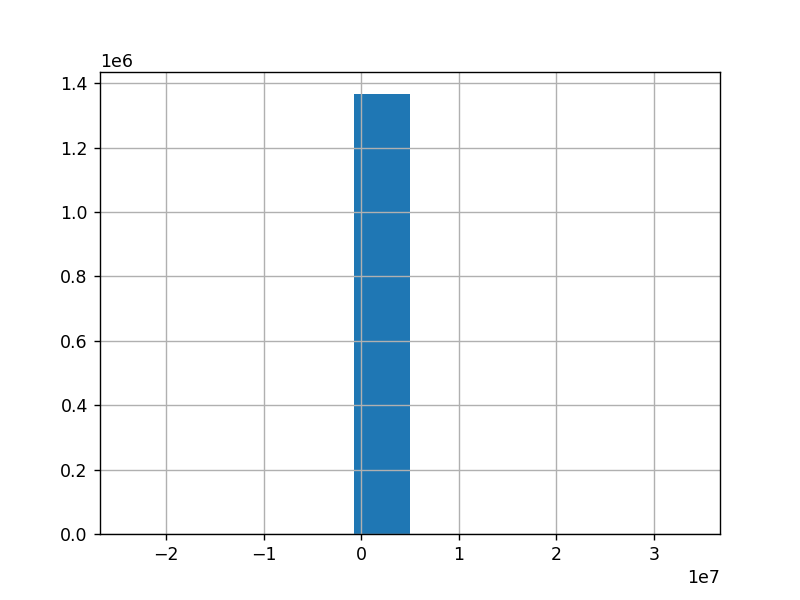

In [529]:
train_trd_df['cny_trx_amt'].hist()

In [536]:
np.sum(np.logical_and(train_trd_df['cny_trx_amt'] < 0.2,train_trd_df['cny_trx_amt'] > -0.2)) / len(train_trd_df)

0.013169145069780744

In [334]:
train_trd_df['trx_tm'].describe()

count                 1367211
unique                1088223
top       2019-06-01 00:29:49
freq                      704
first     2019-05-01 00:00:00
last      2019-06-30 23:59:59
Name: trx_tm, dtype: object

In [269]:
last = datetime.datetime(2019, 7, 1)

begin = last - DateOffset(months = 2)

In [282]:
num_periods = 8

date_ls= pd.date_range(begin, last, num_periods + 1)

In [299]:
train_trd_df['id'].nunique()

31993

In [353]:
def get_trd_window_stat(trd_df, date_ls, agg_func):
    num_periods = len(date_ls) - 1
    df = pd.DataFrame(index= trd_df['id'].unique())
    for i in range(num_periods):
        begin_date = date_ls[i]
        end_date = date_ls[i + 1]
        
        srs_out = trd_df.loc[np.logical_and(trd_df['trx_tm'] >= begin_date, trd_df['trx_tm'] < end_date) and trd_df['Dat_Flg1_Cd'] == 'B'].groupby('id')['cny_trx_amt'].agg(agg_func)
        srs_in = trd_df.loc[np.logical_and(trd_df['trx_tm'] >= begin_date, trd_df['trx_tm'] < end_date) and trd_df['Dat_Flg1_Cd'] == 'C'].groupby('id')['cny_trx_amt'].agg(agg_func)
        df['trd_%s_week%d_in' %(agg_func, i + 1)] = srs_in
        df['trd_%s_week%d_in' %(agg_func, i + 1)].fillna(0, inplace= True)
        df['trd_%s_week%d_out' %(agg_func, i + 1)] = srs_out
        df['trd_%s_week%d_out' %(agg_func, i + 1)].fillna(0, inplace= True)
        df[['trd_%s_week%d_int_out_ratio' %(agg_func, i + 1)] =  df['trd_%s_week%d_out' %(agg_func, i + 1)] / df['trd_%s_week%d_out' %(agg_func, i + 1)]
    return df

In [358]:
def get_trd_window_stat_0(trd_df, date_ls, agg_func):
    num_periods = len(date_ls) - 1
    df = pd.DataFrame(index= trd_df['id'].unique())
    for i in range(num_periods):
        begin_date = date_ls[i]
        end_date = date_ls[i + 1]
        
        srs = trd_df.loc[np.logical_and(trd_df['trx_tm'] >= begin_date, trd_df['trx_tm'] < end_date)].groupby('id')['cny_trx_amt'].agg(agg_func)

        df['trd_%s_week%d_sum' %(agg_func, i + 1)] = srs

    return df

In [360]:
trd_wd_sum = get_trd_window_stat_0(train_trd_df, date_ls, 'sum')

trd_wd_sum.fillna(0, inplace= True)

trd_wd_sum_bad = trd_wd_sum.loc[bad_users, :]

In [364]:
trd_wd_sum_bad.iloc[20:50]

,trd_sum_week1_sum,trd_sum_week2_sum,trd_sum_week3_sum,trd_sum_week4_sum,trd_sum_week5_sum,trd_sum_week6_sum,trd_sum_week7_sum,trd_sum_week8_sum
U2E3838,0.00,0.00,0.00,0.00,0.00,0.00,8.000000e-02,0.00
UC1DEEF,0.00,-19310.00,20168.00,0.00,-20000.00,0.00,1.931000e+04,-3000.00
U2266F0,-1311.56,-10936.33,28129.27,-53.04,-4000.00,19167.64,-8.943770e+03,1770.00
U93B9D2,-90.26,-219.96,-129.60,-4575.80,-296.15,3503.30,-1.494440e+03,-102.41
UD51764,-867.68,-3907.80,-742.42,8554.75,-8278.81,8239.93,-5.932630e+03,-3437.41
UC3F864,-5.00,0.00,400.00,-310.00,-5.00,0.00,0.000000e+00,0.00
UA9D3EF,0.00,0.00,-23.00,-34.44,0.00,-123.50,0.000000e+00,-47.72
UF61096,150.08,-6250.00,6000.00,1330.00,6690.11,-2545.00,-3.022500e+02,-5231.62
U1C38BB,-5956.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00
UD7AA3B,0.00,-13.50,0.00,10.00,400.00,-0.06,0.000000e+00,1520.00


<IPython.core.display.Javascript object>


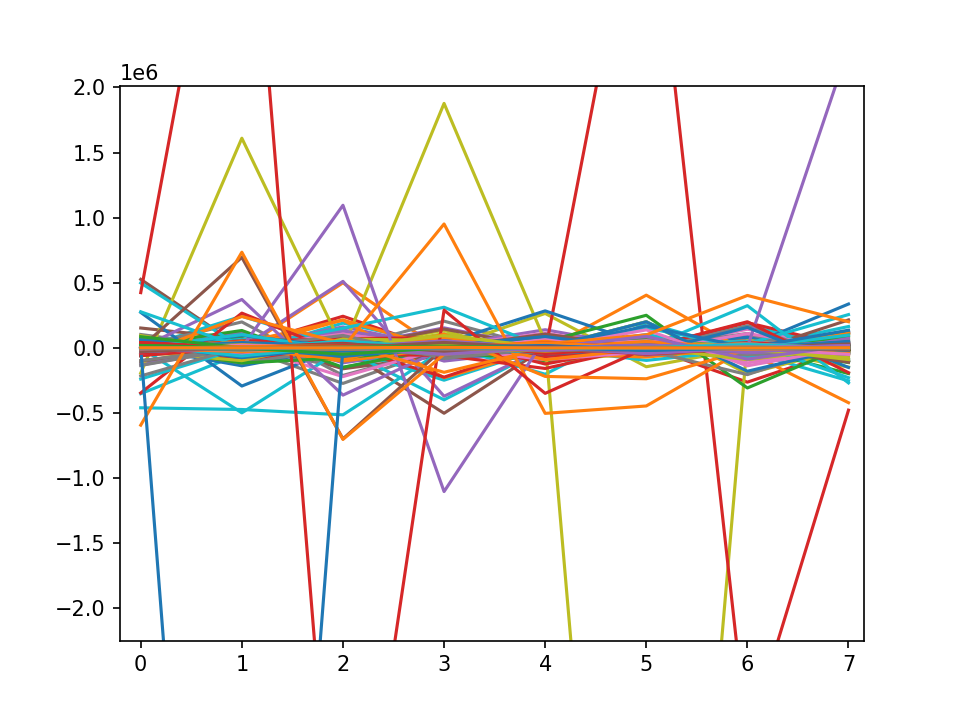

 ...]

In [352]:
plt.plot(trd_wd_sum.loc[bad_users, :].values.T)

#### 查看历史交易行为计数

In [172]:
num_users = 39923

In [169]:
def count_hist_beh(offset):
    begin = last - offset
    hist_beh_count= train_trd_df.loc[train_trd_df['trx_tm'] > begin].groupby('id')['cny_trx_amt'].count()
    return hist_beh_count

In [170]:
hist_beh_count_last1week = count_hist_beh(DateOffset(weeks = 1))

In [171]:
hist_beh_count_last1week.describe()

count    19140.000000
mean         8.182497
std         12.319339
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max        397.000000
Name: cny_trx_amt, dtype: float64

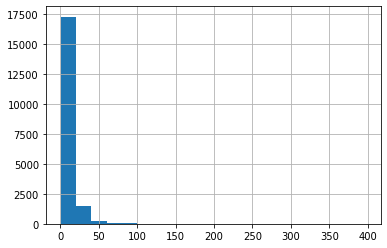

In [175]:
hist_beh_count_last1week.hist(bins = 20)

#### 行为数目分布，至少是指数分布

In [173]:
len(hist_beh_count_last1week) / num_users

0.47942288906144326

### 过去一周 大约有一半的用户有行为，中位数是4个行为

In [176]:
hist_beh_count_last2week = count_hist_beh(DateOffset(weeks = 2))

In [177]:
hist_beh_count_last2week.describe()

count    26684.000000
mean        12.401551
std         22.574620
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max       1441.000000
Name: cny_trx_amt, dtype: float64

In [132]:
col = cat_cols[0]

In [134]:
train_trd_df.loc[train_trd_df['trx_tm'] > last2week, ['id', col]].groupby('id').count()

,Dat_Flg1_Cd
id,
U000101,14
U00015C,1
U0001B8,12
U00025B,4
U000437,13
...,...
UFFF623,2
UFFF6BB,116
UFFF7F4,42


### 查看历史行为数据

In [189]:
train_beh_df = pd.read_csv(os.path.join(train_datapath, 'train_beh.csv'), parse_dates = ['page_tm', ])

In [190]:
train_beh_df.head()

,id,flag,page_no,page_tm
0,U64F0C9,0,SZA,2019-06-30 12:44:27
1,U64F0C9,0,CQE,2019-06-25 16:15:11
2,U64F0C9,0,AAO,2019-06-30 12:44:17
3,U64F0C9,0,CQE,2019-06-17 13:50:12
4,U64F0C9,0,AAO,2019-06-17 13:50:08


In [191]:
train_beh_df.dtypes

id                 object
flag                int64
page_no            object
page_tm    datetime64[ns]
dtype: object

In [201]:
len(train_beh_df)

934282

In [182]:
train_beh_df.groupby('page_no')['flag'].mean()

page_no
AAO    0.149113
BWA    0.149642
BWE    0.151112
CQA    0.148717
CQB    0.109830
CQC    0.114456
CQD    0.118066
CQE    0.143027
CTR    0.164259
EGA    0.205925
EGB    0.203553
FDA    0.083041
FLS    0.149000
FTR    0.187092
GBA    0.142857
JF2    0.107447
JJD    0.071053
JJK    0.060671
LC0    0.128354
LCT    0.096175
MSG    0.155273
MTA    0.088910
SYK    0.053176
SZA    0.145709
SZD    0.144811
TRN    0.172931
XAG    0.152862
XAI    0.148441
ZY1    0.111111
Name: flag, dtype: float64

#### 查看访问不同页面的用户的违约概率

### 找一个违约用户看一下

In [186]:
train_beh_df.loc[train_beh_df['id'] == 'UFFA173']

,id,flag,page_no,page_tm
933535,UFFA173,1,CQE,2019-06-15 15:31:46
933536,UFFA173,1,CQA,2019-06-18 00:42:13
933537,UFFA173,1,CQA,2019-06-16 00:39:28
933538,UFFA173,1,CQE,2019-06-14 04:49:19
933539,UFFA173,1,CQA,2019-06-14 09:13:07
...,...,...,...,...
933804,UFFA173,1,CQE,2019-06-25 14:14:38
933805,UFFA173,1,CQA,2019-06-13 19:36:38
933806,UFFA173,1,SZD,2019-06-26 00:39:48
933807,UFFA173,1,CQA,2019-06-16 01:52:18


In [193]:
train_beh_df['page_tm'].describe()

count                  934282
unique                 690024
top       2019-06-28 13:35:37
freq                        9
first     2019-06-01 00:00:09
last      2019-06-30 23:59:57
Name: page_tm, dtype: object

In [195]:
user_beh_last1month= train_beh_df.groupby('id')['page_no'].count()

In [203]:
user_beh_last1month.describe()

count    11913.000000
mean        78.425418
std        126.095524
min          1.000000
25%         15.000000
50%         40.000000
75%         94.000000
max       3617.000000
Name: page_no, dtype: float64

#### 4万用户中大约有1万用户，有历史行为数据

In [199]:
last - Week(2)

Timestamp('2019-06-17 00:00:00')

In [197]:
user_beh_last2week = train_beh_df[train_beh_df['page_tm'] > last - Week(2)].groupby('id')['page_no'].count()

In [202]:
user_beh_last2week.describe()

count    10075.000000
mean        45.061042
std         67.278474
min          1.000000
25%         10.000000
50%         25.000000
75%         53.000000
max       1787.000000
Name: page_no, dtype: float64

In [209]:
user_beh_last1week = train_beh_df[train_beh_df['page_tm'] > last - Week(1)].groupby('id')['page_no'].count()

In [210]:
user_beh_last1week.describe()

count    8074.000000
mean       28.784741
std        40.814050
min         1.000000
25%         7.000000
50%        16.000000
75%        34.000000
max       850.000000
Name: page_no, dtype: float64

#### 依据过去一个月，两周，即一周的有行为的用户数目，变化不大，推测许多用户可能压根不会使用App，而使用App的用户则往往会经常使用

一共提供了29个页面

In [242]:
offset = Week(1)
suffix = 'last1week'

In [243]:


user_beh_count =  train_beh_df[train_beh_df['page_tm'] > last - offset].groupby(['id', 'page_no'])['flag'].count()

user_page_count= user_beh_count_last1week.unstack()

user_page_count.fillna(0,inplace= True)

user_page_ratio_arr = user_page_count.values / np.sum(user_page_count.values, axis = 1, keepdims= True)

user_page_ratio_df = pd.DataFrame(user_page_ratio_arr, index = user_page_count.index, columns = [col + '_ratio' for col in user_page_count.columns])

user_page_feat_df = pd.concat([user_page_count, user_page_ratio_df], axis = 1)

user_page_feat_df.rename(columns = lambda col: col + '_' + suffix, inplace= True)

In [ ]:
user_page_count

In [252]:
user_page_feat_df.head()

,AAO_last1week,BWA_last1week,BWE_last1week,CQA_last1week,CQB_last1week,CQC_last1week,CQD_last1week,CQE_last1week,CTR_last1week,EGA_last1week,...,LCT_ratio_last1week,MSG_ratio_last1week,MTA_ratio_last1week,SYK_ratio_last1week,SZA_ratio_last1week,SZD_ratio_last1week,TRN_ratio_last1week,XAG_ratio_last1week,XAI_ratio_last1week,ZY1_ratio_last1week
id,,,,,,,,,,,,,,,,,,,,,
U0001B8,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
U0015B2,253.0,0.0,0.0,135.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.009412,0.0,0.0,0.016471,0.0,0.300000,0.0,0.000000,0.0
U0016FF,6.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.058824,0.0,0.000000,0.0,0.000000,0.0
U001945,2.0,1.0,0.0,17.0,1.0,1.0,1.0,13.0,0.0,0.0,...,0.0,0.069767,0.0,0.0,0.023256,0.0,0.000000,0.0,0.069767,0.0
U00297F,0.0,0.0,0.0,26.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.012821,0.0,0.333333,0.0,0.000000,0.0
